# Clustering using K-Means
https://www.youtube.com/watch?v=7J3mz9LMjqg

## Problem:
Segregate customers into optimal clusters using mall customer dataset and performing K-Means clustering.
## Approach:
* Understanding the data.
* Use Elbow method to find optimal no. of clusters.
3. Train a model using unsupervised learning algorithm (K-Means).
4. Plot clusters.

## 1. Understanding the data 

In [10]:
# Import useful and required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
os.chdir('C:/Sereda/DataScience/Segmentation/K-Means')
df = pd.read_csv('Mall_Customers.csv') # https://www.kaggle.com/datasets/shwetabh123/mall-customers?select=Mall_Customers.csv
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
df.shape

(200, 5)

In [13]:
df.info() # Check for the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
# Prepare data for clustering
X = df.iloc[:,[3,4]].values # Annual income and Spending score
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## 2. Use Elbow method to find optimal no. of clusters
* Using K-Means to iterate from 1 to 10 clusters and plotting an Elbow plot
* Deciding optimal no. of clusters.

K-Means is a method to cluster unlabeled datasets into a specific number of clusters (K) without the need to train the model.

In [21]:
from sklearn.cluster import KMeans

In [29]:
wcss = [] # Within-cluster sum of squares of distances between each point and a centroid of its cluster for each K
for i in range(2,11): # do not use K=1
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0) # k-means++ smarter initialization improves clustering
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

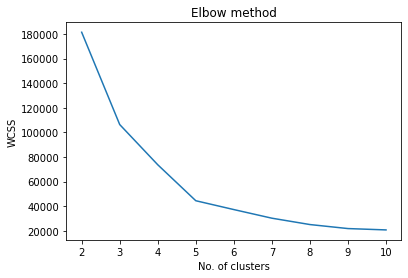

In [32]:
plt.plot(range(2,11), wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow at K=5, which is thus the optimal no. of clusters.
## 3. Train a model using unsupervised learning algorithm (K-Means).
* Initializing our K-Means model with selected optimal K.
* Plot clusters to gain an intuition regarding our customers.

In [33]:
kmeansmodel = KMeans(n_clusters = 5, init='k-means++', random_state=0) # initialize the model

In [34]:
y_kmeans = kmeansmodel.fit_predict(X) # predict clusters

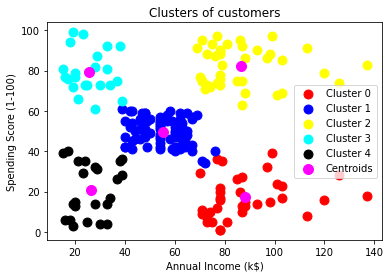

In [44]:
colors = ["red","blue","yellow","cyan","black"]
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 80, c = colors[i], label = "Cluster "+str(i))
    # Annual income on x-axis, Spending score on y-axis
plt.scatter(kmeansmodel.cluster_centers_[:,0], kmeansmodel.cluster_centers_[:,1], s = 100, c = 'magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cluster 3: low income, high spending.
Cluster 0: high income, low spending.
Cluster 1: majority of customers: average income and average spending - the target group.

In [51]:
target_cluster = X[y_kmeans == 1]
print(f"Income  = $[{min(target_cluster[:,0])}-{max(target_cluster[:,0])}]k")
print(f"Spending score = $[{min(target_cluster[:,1])}-{max(target_cluster[:,1])}]k")

Income  = $[39-76]k
Spending score = $[34-61]k
